<h1>ReadPlotTrilliumCompactMiniseedFile</h1>
<p>by Farnyuh Menq</p>
<p>NHERI@UTexas site Manager</p>
<p>2017/8/23</p>
<p>This notebook open plot MiniSeed data files.  </p>
<p>obspy library provided by IRIS is used to read a MiniSEED file. More information regarding obspy module can be found at https://github.com/obspy/obspy/wiki</p>

In [2]:
# Import Library 
from pylab import *
import scipy
#import SglPrcFM_V2 as mf
from obspy import read # IRIS Python module for reading a MiniSEED file

## Load data and print out the contents of the data

In [3]:
folder = r'C:\Users\Farnyuh Menq\Desktop\Static\201708 NJ Bridge\Cox NJ Bridge\NJBridgeTrillium\Raw\31July2017'
folder = folder + '\\'
StartTime = '20170731_150000'
st_1 = read(folder + 'UT.STN01_' + StartTime + '.miniseed') #Ground surface, east pier, median
st_2 = read(folder + 'UT.STN02_' + StartTime + '.miniseed') #Ground surface, west pier, median
st_3 = read(folder + 'UT.STN03_' + StartTime + '.miniseed') #Ground surface, 85 ft west of west pier, median, free field
st_4 = read(folder + 'UT.STN04_' + StartTime + '.miniseed') #Deck, middle of bridge, above bent, west side
st_5 = read(folder + 'UT.STN05_' + StartTime + '.miniseed') #Deck, middle of bridge, above bent, east side

In [4]:
# st[0]: East, st[1]: vertical, st[2]: North - Note this order is not cosistent
print (st_1)
print (st_2)
print (st_3)
print (st_4)
print (st_5)
st =[st_1, st_2, st_3, st_4, st_5] # put all data in a list for ease of processing
print (st[4][1].data)
# time records are saved in integer with a calibration of 20,000 bits/inch/sec.
# Note: BHZ is vertical component, BHN is north component, and BHE is east component. 

3 Trace(s) in Stream:
UT.STN01..BHN | 2017-07-31T15:00:00.000000Z - 2017-07-31T15:59:59.990000Z | 100.0 Hz, 360000 samples
UT.STN01..BHZ | 2017-07-31T15:00:00.000000Z - 2017-07-31T15:59:59.990000Z | 100.0 Hz, 360000 samples
UT.STN01..BHE | 2017-07-31T15:00:00.000000Z - 2017-07-31T15:59:59.990000Z | 100.0 Hz, 360000 samples
3 Trace(s) in Stream:
UT.STN02..BHE | 2017-07-31T15:00:00.000000Z - 2017-07-31T15:59:59.990000Z | 100.0 Hz, 360000 samples
UT.STN02..BHN | 2017-07-31T15:00:00.000000Z - 2017-07-31T15:59:59.990000Z | 100.0 Hz, 360000 samples
UT.STN02..BHZ | 2017-07-31T15:00:00.000000Z - 2017-07-31T15:59:59.990000Z | 100.0 Hz, 360000 samples
3 Trace(s) in Stream:
UT.STN03..BHE | 2017-07-31T15:00:00.000000Z - 2017-07-31T15:59:59.990000Z | 100.0 Hz, 360000 samples
UT.STN03..BHZ | 2017-07-31T15:00:00.000000Z - 2017-07-31T15:59:59.990000Z | 100.0 Hz, 360000 samples
UT.STN03..BHN | 2017-07-31T15:00:00.000000Z - 2017-07-31T15:59:59.990000Z | 100.0 Hz, 360000 samples
3 Trace(s) in Stream:
UT.

In [1]:
N_Dir = [0, 1, 2, 1, 1] # list of channel data of North direction
E_Dir = [2, 0, 0, 2, 2] # list of channel data of East direction
V_Dir = [1, 2, 1, 0, 0] # list of channel data of Vertical direction

In [5]:
N = len(st_1[0].data)
print ('Length of the record is ', N)

# generate a time series
t = np.linspace(0.0, N / st_1[0].stats.sampling_rate, st_1[0].stats.npts)

Length of the record is  360000


In [20]:
# Calibration factor
# Trillium compact: 29492 V/inch/sec. (749.1 m/V/sec. *100/2.54)
# Taurus: 1 count/μV (at hardware gain = 1, input range 20 V peak)
#         1000000 count / V, at gain =1 
#         1000000 *0.4 count / V, at gain =0.4 
Cal = 749.1*100/2.54*1000000*0.4
print ('Calibration factor = ', Cal, 'count/inch/sec.')

Calibration factor =  11796850393.700788 count/inch/sec.


## Plot time record from Station #1

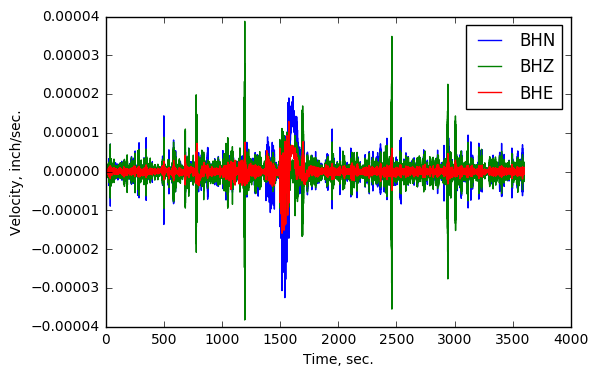

In [21]:
plt.plot(t,st_1[0].data/Cal, t,st_1[1].data/Cal, t,st_1[2].data/Cal)
plt.xlabel('Time, sec.')
plt.ylabel('Velocity, inch/sec.')
plt.legend([st_1[0].stats.channel ,st_1[1].stats.channel,st_1[2].stats.channel])
# Note: BHZ is vertical component, BHN is north component, and BHE is east component. 
plt.show ()

## Plot all North component

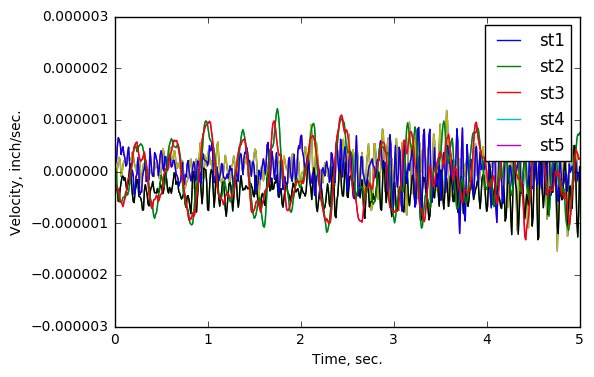

In [32]:
for j in range (0, 5):
    plt.plot(t, st[j][N_Dir[j]].data/Cal)
plt.xlabel('Time, sec.')
plt.ylabel('Velocity, inch/sec.')
plt.legend(['st1', 'st2', 'st3', 'st4', 'st5'])
plt.xlim(0, 5)
plt.ylim(-0.000003, 0.000003)
# Note: BHZ is vertical component, BHN is north component, and BHE is east component. 
plt.show ()

## Plot all East component

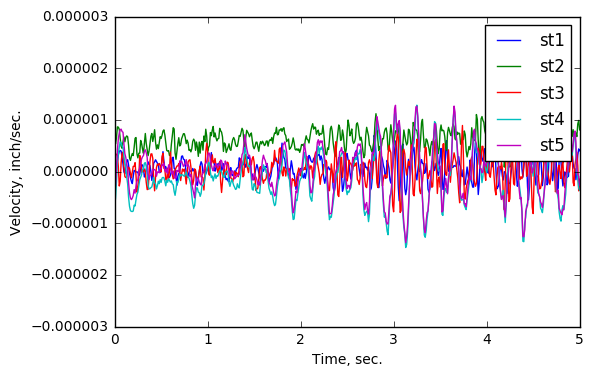

In [33]:
for j in range (0, 5):
    plt.plot(t, st[j][E_Dir[j]].data/Cal)
plt.xlabel('Time, sec.')
plt.ylabel('Velocity, inch/sec.')
plt.legend(['st1', 'st2', 'st3', 'st4', 'st5'])
plt.xlim(0, 5)
plt.ylim(-0.000003, 0.000003)
# Note: BHZ is vertical component, BHN is north component, and BHE is east component. 
plt.show ()

## Plot all Vertical component

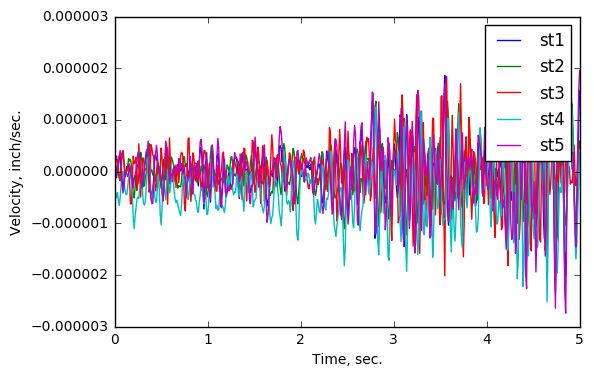

In [34]:
for j in range (0, 5):
    plt.plot(t, st[j][V_Dir[j]].data/Cal)
plt.xlabel('Time, sec.')
plt.ylabel('Velocity, inch/sec.')
plt.legend(['st1', 'st2', 'st3', 'st4', 'st5'])
plt.xlim(0, 5)
plt.ylim(-0.000003, 0.000003)
# Note: BHZ is vertical component, BHN is north component, and BHE is east component. 
plt.show ()